# PRJNA896334 - Pramanik et al.

Article link: [Pramanik](https://pubs.acs.org/doi/full/10.1021/envhealth.5c00048).

In [1]:
suppressPackageStartupMessages({
    library(provoc)
    library(here)
    library(ggplot2)
    library(lubridate)
})

prj <- "PRJNA896334"
lineages_in_paper <- c("XBB.2.3", "XXB.1.9", "XBB.1.5", "XBB.1.16",
    "CH.1.1", "BF.7", "JN.1", "BQ.1", "KP.2",
    "BA.5", "BA.4", "BA.3", "BA.2.10", "BA.1", "BA.2.12", "BA.2.75",
    "B.1.1.529", "AY.4", "B.1.1.7"
)


In [2]:
coco <- read.csv(
    here(
        "data/processed/",
        paste0(prj, "_processed.csv.gz")
    )
)
coco$mutation <- parse_mutations(coco$label)
head(coco)


,position,label,mutation,frequency,coverage,count,sra,date,sample_name,avg_spot_len,bases,bioproject,location,ww_population
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<lgl>
1,1001,+1002.A,ins:1002:1,0,1524,0,SRR22118071,2021-12-27,PR-48,70,364385189,PRJNA896334,Pune,NA
2,10065,+10066.A,ins:10066:1,0,71,0,SRR22118071,2021-12-27,PR-48,70,364385189,PRJNA896334,Pune,NA
3,10190,+10191.C,ins:10191:1,0,18496,0,SRR22118071,2021-12-27,PR-48,70,364385189,PRJNA896334,Pune,NA
4,10315,+10316.A,ins:10316:1,0,19354,0,SRR22118071,2021-12-27,PR-48,70,364385189,PRJNA896334,Pune,NA
5,10335,+10336.AG,ins:10336:2,0,16866,0,SRR22118071,2021-12-27,PR-48,70,364385189,PRJNA896334,Pune,NA
6,10364,+10365.T,ins:10365:1,0,17241,0,SRR22118071,2021-12-27,PR-48,70,364385189,PRJNA896334,Pune,NA


In [ ]:
barcodes <- provoc::usher_barcodes()
print("Lineages not in barcodes:")
print(setdiff(lineages_in_paper, rownames(barcodes)))
available_lineages <- intersect(lineages_in_paper, rownames(barcodes))
barcodes <- filter_lineages(barcodes, available_lineages)
dim(barcodes)


[1] "XXB.1.9"


[1]  18 240

In [5]:
system.time(
    res <- provoc(count / coverage ~ .,
        data = coco,
        lineage_defs = barcodes,
        by = "sra")
)
head(res)


   user  system elapsed 
337.891   6.754 354.308 

,rho,ci_low,ci_high,lineage,sra,date,sample_name,avg_spot_len,bases,bioproject,location,ww_population
,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<lgl>
1,7.754988e-05,NA,NA,KP.2,SRR22118071,2021-12-27,PR-48,70,364385189,PRJNA896334,Pune,NA
2,1.815684e-06,NA,NA,JN.1,SRR22118071,2021-12-27,PR-48,70,364385189,PRJNA896334,Pune,NA
3,3.919772e-05,NA,NA,XBB.1.16,SRR22118071,2021-12-27,PR-48,70,364385189,PRJNA896334,Pune,NA
4,1.483047e-06,NA,NA,XBB.1.5,SRR22118071,2021-12-27,PR-48,70,364385189,PRJNA896334,Pune,NA
5,7.582886e-07,NA,NA,XBB.2.3,SRR22118071,2021-12-27,PR-48,70,364385189,PRJNA896334,Pune,NA
6,1.517172e-05,NA,NA,CH.1.1,SRR22118071,2021-12-27,PR-48,70,364385189,PRJNA896334,Pune,NA


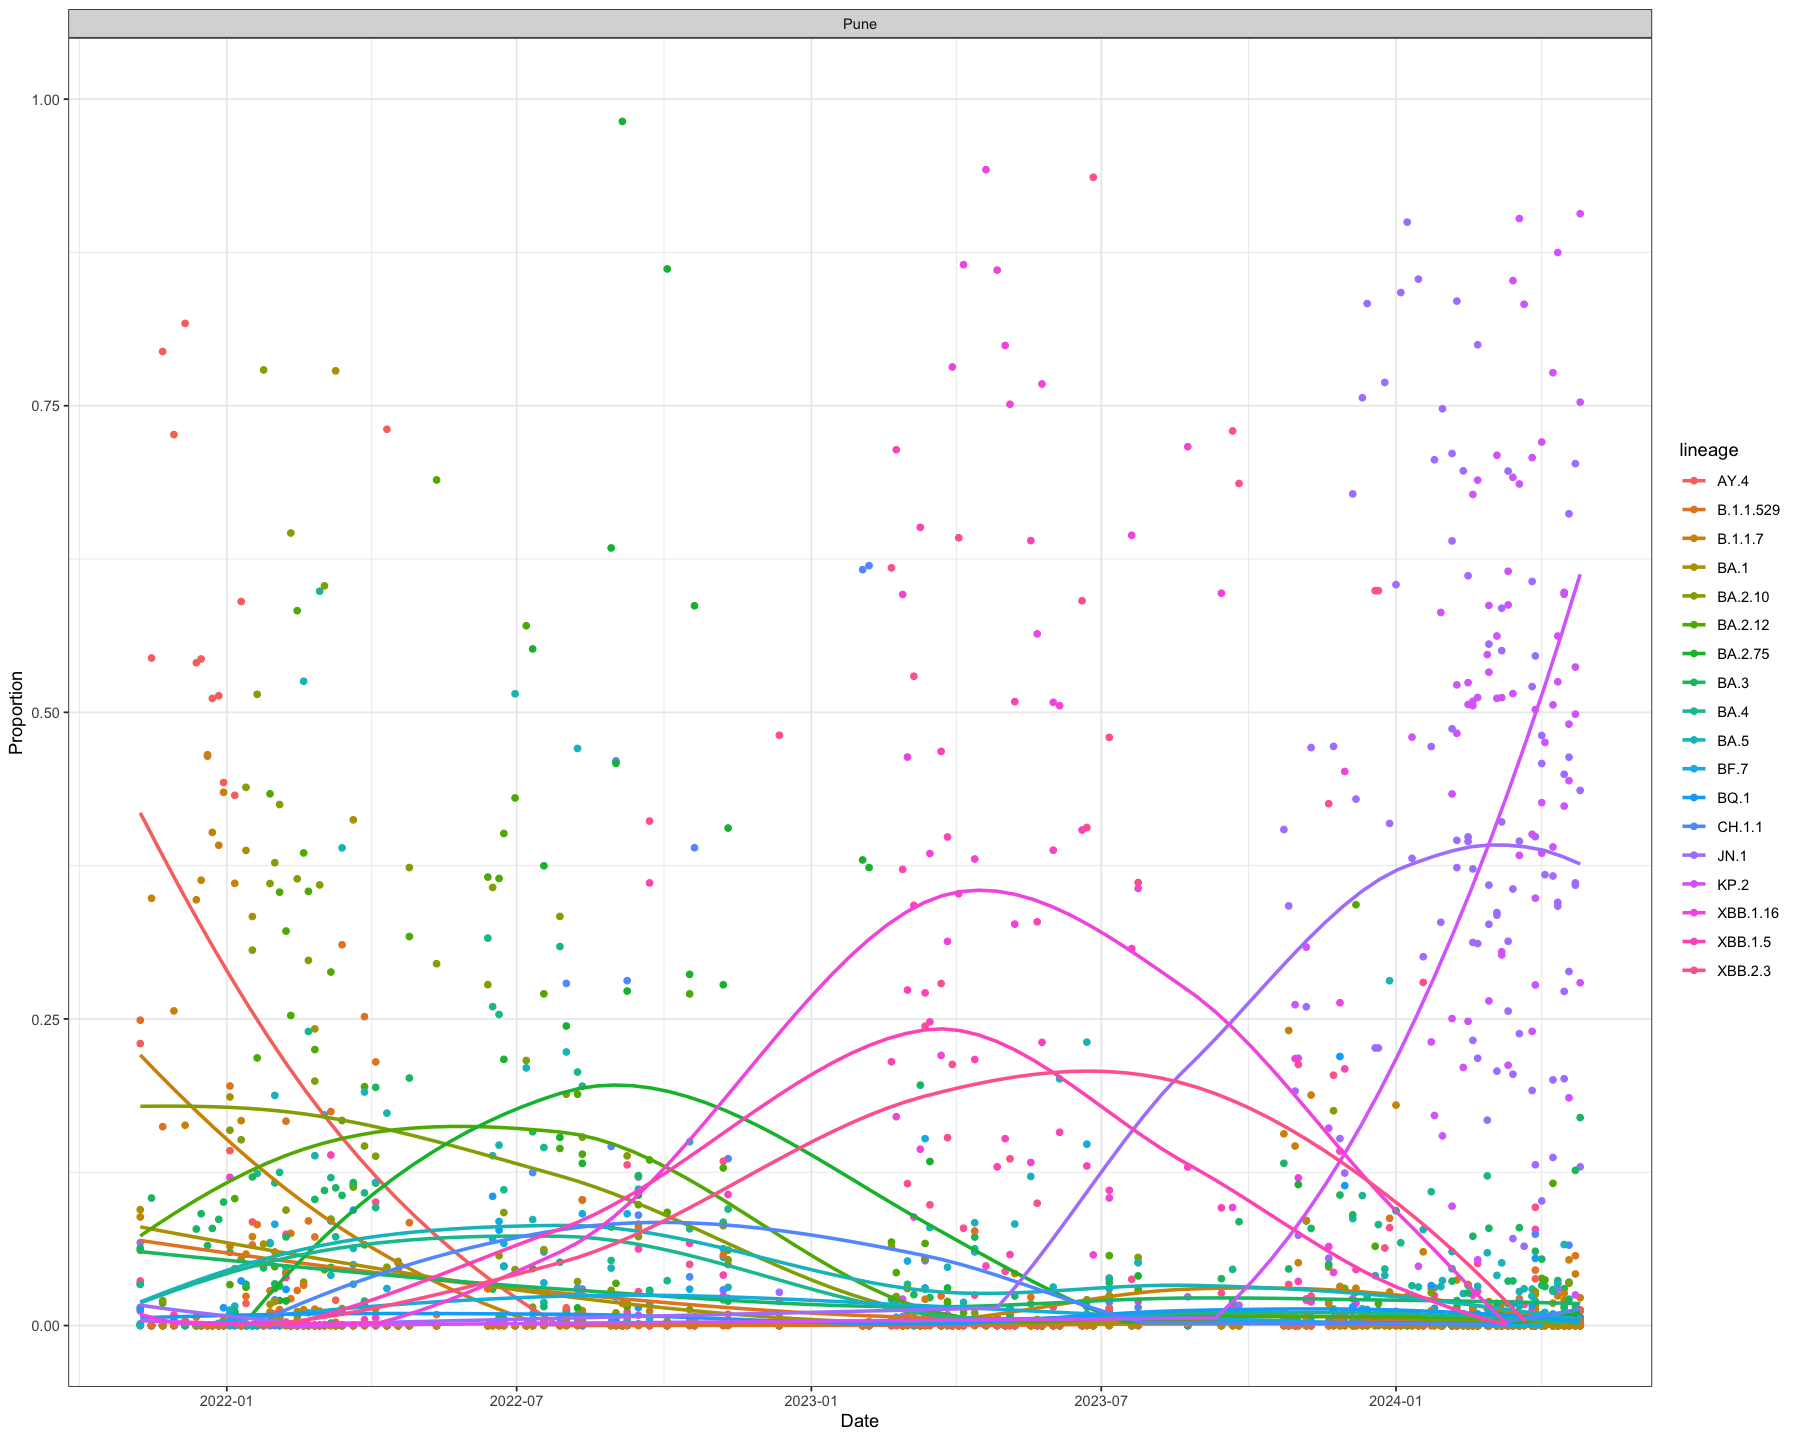

In [6]:
options(repr.plot.width = 15, repr.plot.height = 12)

res$date <- lubridate::ymd(res$date)

gg <- autoplot(res, date_col = "date") + facet_wrap(~location) +
    geom_smooth(formula = y ~ x, se = FALSE, method = "loess") +
    theme_bw()
suppressWarnings(print(gg))
